# **Recherche en grille** : `TSNE`

    _tsne_params = {
        'n_components': 2,           # Dimension of the embedded space : fixed
        'perplexity': 30.0,          # [5, 50] Larger datasets usually require a larger perplexity.
        'early_exaggeration': 12.0,  # Not very critical
        'learning_rate': 'auto',     # [10.0, 1000.0],  max(N / early_exaggeration / 4, 50)
        'n_iter': 1000,              # Maximum number of iterations for the optimization (> 250)
        'init': 'random',            # Otherwise 'pca', but not with a sparse input matrix like in this project
        'random_state':42,
        'method': 'barnes_hut',      # Otherwise 'exact' but on small sample (O(N^2) against O(NlogN))
    }

# Les jeux de données


PREPROCESSING OF CORPUS `PRODUCT_NAME`
n_sentences: 1050


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,20
freq,3,23,33,66,164,221,207,140,72,54,36,15,5,3,4,1,1,2


mean: 5.80
med : 6.00
std : 2.33


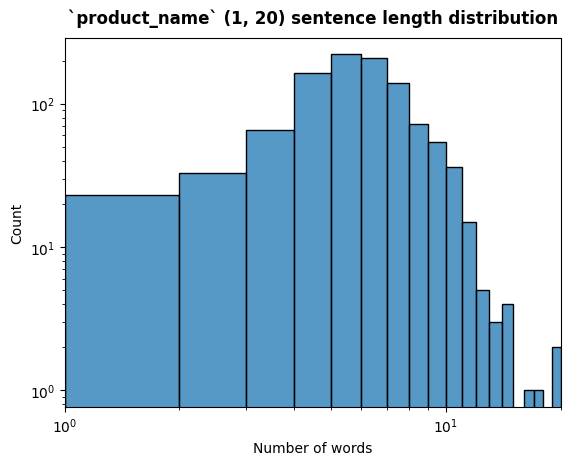


PREPROCESSING OF CORPUS `DESCRIPTION`
n_sentences: 1050


,10,11,12,13,14,15,16,17,18,19,...,217,221,222,224,228,233,245,264,341,356
freq,1,4,37,33,27,45,24,47,21,38,...,6,1,2,1,1,1,1,1,1,1


mean: 50.01
med : 31.00
std : 46.41


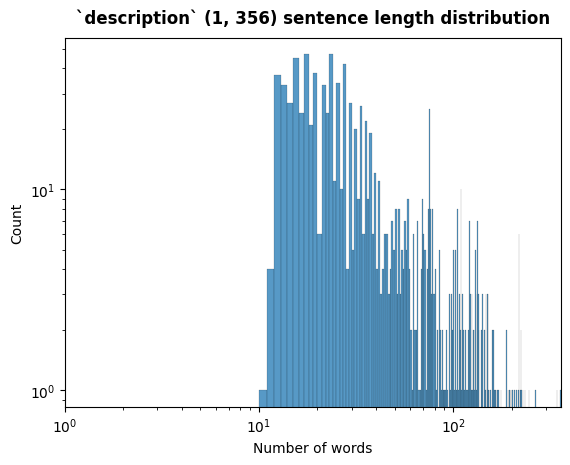

In [1]:
from pipeline import tx_ml_preprocess
names = ['product_name', 'description']
corpora = {}
for name in names:
    corpora[name] = tx_ml_preprocess(name)   # sents, cla_labels = 

# Réglages mono-paramètre

## Effet de `perplexity`

L'accroissement de la perplexité se paie par l'allongement du temps d'exécution.

Son effet est bénéfique jusqu'à l'atteinte d'un premier pic, puis elle devient volatile, et réatteint plusieurs fois ce premier pic mais pour des coûts temps bien supérieurs.

Pour `product_name` on trouve ce premier pic autour de 15 avec un ARI de 37 %. On pourra affiner.

Pour `description`, c'est autour de 40, avec un ARI de 36 % (il y a plus de features et il y a donc besoin d'une plus grande perplexité).

In [3]:
import numpy as np
display(np.logspace(2.0, 10.0, num=10, base=2.0))

array([   4.        ,    7.4069977 ,   13.71590373,   25.39841683,
         47.03150375,   87.09056001,  161.26989439,  298.63143413,
        552.99058631, 1024.        ])

### Sur `product_name`

In [5]:
from pipeline import tx_ml_bow_count
import numpy as np
import pandas as pd
import itertools

name = 'product_name'
sents, cla_labels = corpora[name]

n = 30
perplexity_range = np.logspace(2.0, 10.0, num=n, base=2.0)
#max_df_range = np.linspace(.95, .25, 5)
#max_ng_range = 1 + np.arange(10)
# ngram_ranges = sub_ranges(1 + np.arange(6))
print("perplexity_range:", perplexity_range)
#print("max_df_range:", max_df_range)
#print("max_ng_range:", max_ng_range)

#print("ngram_ranges:", ngram_ranges)

print("(perplexity)\t=>   ARI  |   Time   | n_features")
rows = []
params_list = itertools.product(perplexity_range)    # max_ng_range, max_df_range, 
for params in params_list:
    perplexity, = params   # max_ng, max_df, 
    #print(f"{max_ng}, {max_df:.2f}, {min_df}", end=" => ")
    print(f"{perplexity:.4f}", end="\t\t=> ")
    _, ari, dt, n_features = tx_ml_bow_count(
        sents, cla_labels, name,
        vectorizer_params={
            'min_df': 12,
            #'max_df': max_df,
            #'ngram_range': (1, max_ng)
        },
        tsne_params={
            'perplexity': perplexity
        }
        # verbosity=3
    )
    print(f"{ari:.4f} | {dt:.4f} s | {n_features}")
    rows.append((perplexity, ari, dt, n_features))   #

gridsearch_data = pd.DataFrame(rows, columns=['perplexity', 'ari', 'dt', 'n_features'])   #, 'max_df', 'max_ng'
display(gridsearch_data)

perplexity_range: [   4.            4.8428693     5.86334577    7.09885432    8.59470592
   10.40575936   12.59843315   15.2531413    18.46724244   22.35861039
   27.06995698   32.77406593   39.68012946   48.04142024   58.16457984
   70.42086457   85.25976085  103.22546966  124.9768646   151.31165532
  183.19564272  221.79813868  268.53484936  325.11979475  393.62816851
  476.57244361  576.99451455  698.57725575  845.77958706 1024.        ]
(perplexity)	=>   ARI  |   Time   | n_features
4.0000		=> 0.1901 | 4.2270 s | 101
4.8429		=> 0.1960 | 3.8791 s | 101
5.8633		=> 0.1547 | 3.8877 s | 101
7.0989		=> 0.2170 | 4.3508 s | 101
8.5947		=> 0.2335 | 4.2687 s | 101
10.4058		=> 0.3037 | 3.9460 s | 101
12.5984		=> 0.3142 | 4.2250 s | 101
15.2531		=> 0.3670 | 4.2810 s | 101
18.4672		=> 0.3473 | 4.7496 s | 101
22.3586		=> 0.3348 | 4.7577 s | 101
27.0700		=> 0.3012 | 5.0182 s | 101
32.7741		=> 0.3132 | 6.1038 s | 101
39.6801		=> 0.3656 | 6.6610 s | 101
48.0414		=> 0.3441 | 7.7871 s | 101
58.1646		

,perplexity,ari,dt,n_features
0,4.000000,0.190105,4.227047,101
1,4.842869,0.195997,3.879064,101
2,5.863346,0.154700,3.887672,101
3,7.098854,0.216978,4.350768,101
4,8.594706,0.233512,4.268711,101
5,10.405759,0.303677,3.946046,101
6,12.598433,0.314173,4.224954,101
7,15.253141,0.367015,4.280986,101
8,18.467242,0.347347,4.749593,101
9,22.358610,0.334793,4.757720,101


### Sur `description`

In [6]:
from pipeline import tx_ml_bow_count
import numpy as np
import pandas as pd
import itertools

name = 'description'
sents, cla_labels = corpora[name]

n = 30
perplexity_range = np.logspace(2.0, 10.0, num=n, base=2.0)
#max_df_range = np.linspace(.95, .25, 5)
#max_ng_range = 1 + np.arange(10)
# ngram_ranges = sub_ranges(1 + np.arange(6))
print("perplexity_range:", perplexity_range)
#print("max_df_range:", max_df_range)
#print("max_ng_range:", max_ng_range)

#print("ngram_ranges:", ngram_ranges)

print("(perplexity)\t=>   ARI  |   Time   | n_features")
rows = []
params_list = itertools.product(perplexity_range)    # max_ng_range, max_df_range, 
for params in params_list:
    perplexity, = params   # max_ng, max_df, 
    #print(f"{max_ng}, {max_df:.2f}, {min_df}", end=" => ")
    print(f"{perplexity:.4f}", end="\t\t=> ")
    _, ari, dt, n_features = tx_ml_bow_count(
        sents, cla_labels, name,
        vectorizer_params={
            'min_df': 12,
            #'max_df': max_df,
            #'ngram_range': (1, max_ng)
        },
        tsne_params={
            'perplexity': perplexity
        }
        # verbosity=3
    )
    print(f"{ari:.4f} | {dt:.4f} s | {n_features}")
    rows.append((perplexity, ari, dt, n_features))   #

gridsearch_data = pd.DataFrame(rows, columns=['perplexity', 'ari', 'dt', 'n_features'])   #, 'max_df', 'max_ng'
display(gridsearch_data)

perplexity_range: [   4.            4.8428693     5.86334577    7.09885432    8.59470592
   10.40575936   12.59843315   15.2531413    18.46724244   22.35861039
   27.06995698   32.77406593   39.68012946   48.04142024   58.16457984
   70.42086457   85.25976085  103.22546966  124.9768646   151.31165532
  183.19564272  221.79813868  268.53484936  325.11979475  393.62816851
  476.57244361  576.99451455  698.57725575  845.77958706 1024.        ]
(perplexity)	=>   ARI  |   Time   | n_features
4.0000		=> 0.2396 | 5.1918 s | 730
4.8429		=> 0.1922 | 5.0140 s | 730
5.8633		=> 0.3001 | 4.7139 s | 730
7.0989		=> 0.3179 | 4.8041 s | 730
8.5947		=> 0.3056 | 4.8590 s | 730
10.4058		=> 0.3159 | 5.1065 s | 730
12.5984		=> 0.3147 | 5.3951 s | 730
15.2531		=> 0.2966 | 5.3845 s | 730
18.4672		=> 0.3323 | 5.6076 s | 730
22.3586		=> 0.3190 | 5.8295 s | 730
27.0700		=> 0.3412 | 6.1400 s | 730
32.7741		=> 0.3107 | 6.1285 s | 730
39.6801		=> 0.3647 | 6.7495 s | 730
48.0414		=> 0.3578 | 8.2154 s | 730
58.1646		

,perplexity,ari,dt,n_features
0,4.000000,0.239551,5.191846,730
1,4.842869,0.192169,5.013968,730
2,5.863346,0.300143,4.713937,730
3,7.098854,0.317934,4.804096,730
4,8.594706,0.305621,4.859022,730
5,10.405759,0.315949,5.106520,730
6,12.598433,0.314676,5.395145,730
7,15.253141,0.296592,5.384539,730
8,18.467242,0.332263,5.607622,730
9,22.358610,0.319015,5.829543,730
